> ## Import Libraries

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.pipeline import Pipeline
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# custom modules
import sys
sys.path.append('../')
from scripts.dataframe import load_data as ld;

> ## Load Dataset

In [5]:
# Load training data
data_paths = {
    'train' : '../docs/train_data.txt',
    'test':'../docs/test_data.txt',
    'test_solution':'../docs/test_data_solution.txt'
}
train_data = ld(data_paths['train'])
train_data.head()

,id,title,genre,plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


> ## EDA

In [10]:
train_data.describe()

,id,title,genre,plot
count,54214,54214,54214,54214
unique,54214,54214,27,54086
top,54214,Nature's Fury: Storm of the Century (2006),drama,Grammy - music award of the American academy o...
freq,1,1,13613,12


>> ### Genre Distribution plot

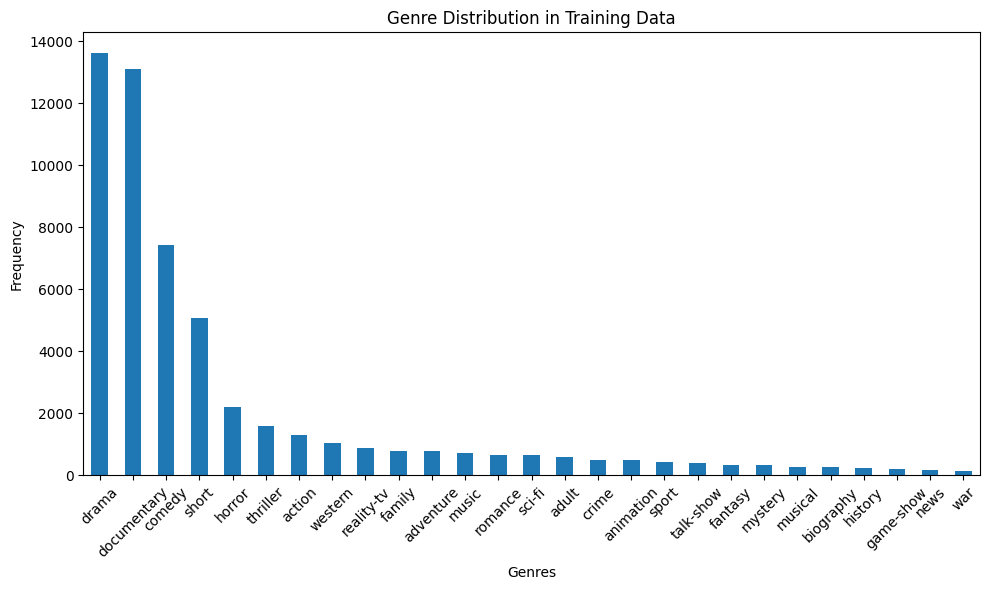

In [17]:
plt.figure(figsize=(10, 6))
train_data['genre'].explode().value_counts().plot(kind='bar')

plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Genre Distribution in Training Data')
plt.tight_layout() 
plt.show()

>> ### Movie-Plot Distribution plot

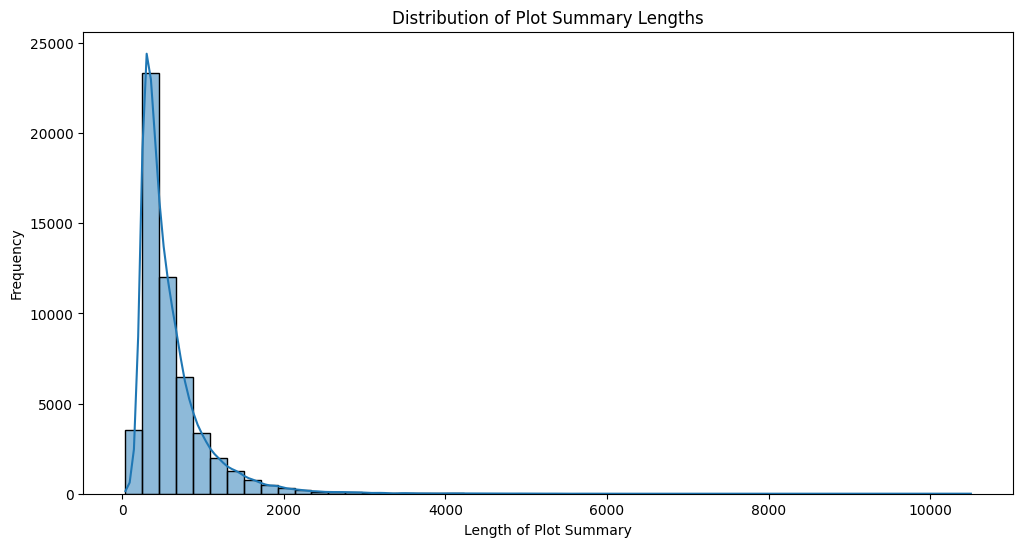

In [24]:
train_data['plot_length'] = train_data['plot'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(train_data['plot_length'], bins=50, kde=True)
plt.xlabel('Length of Plot Summary')
plt.ylabel('Frequency')
plt.title('Distribution of Plot Summary Lengths')
plt.show()

>> ### Top Genres plot

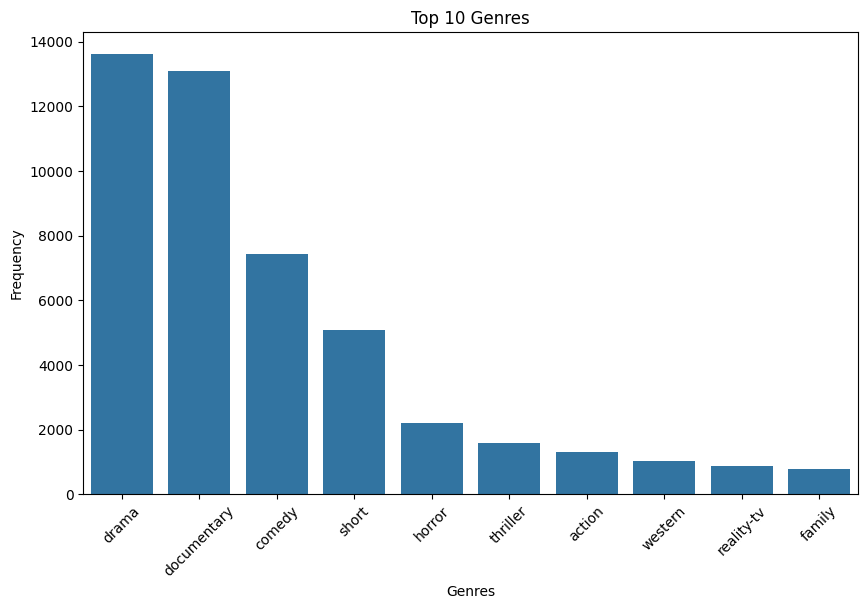

In [25]:
# Top genres
top_genres = train_data['genre'].explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Top 10 Genres')
plt.show()

In [27]:
X = train_data['plot']  # Feature: plot summary
y = train_data['genre']  # Target: genres

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Create a pipeline with TF-IDF and a classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', OneVsRestClassifier(LogisticRegression(max_iter=1000)))
])

In [30]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier',
                 OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000)))])

In [31]:
y_pred = pipeline.predict(X_test)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

Accuracy: 0.33745273448307667
              precision    recall  f1-score   support

           -       0.70      0.09      0.16       456
           a       0.77      0.87      0.82      6793
           b       0.00      0.00      0.00        61
           c       0.74      0.67      0.70      4960
           d       0.77      0.92      0.84      7050
           e       0.73      0.70      0.71      5330
           f       0.62      0.03      0.05       367
           g       1.00      0.06      0.11       101
           h       0.78      0.22      0.34      2012
           i       0.72      0.13      0.22      1568
           k       1.00      0.01      0.02        81
           l       0.67      0.04      0.07       894
           m       0.79      0.94      0.86      7601
           n       0.77      0.61      0.68      3624
           o       0.76      0.82      0.79      6416
           p       0.71      0.03      0.06       154
           r       0.83      0.95      0.89      82

/home/am/PycharmProjects/CODSOFT/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/am/PycharmProjects/CODSOFT/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [ ]:
from scripts.modeling import *
best_model = hyperparameter_tuning(X_train, y_train)

y_pred_best = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=mlb.classes_))